## Prosper Loan Data Analysis

by Cyril Odoi

The dataset under analysis contains approximately 114,000 loan applications for a total of $949.9MM over the period from 2009 through 2014.

The goal of this Udacity Project is to apply skills acquired to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

I was curious to examine the factors that count in determining the Borrower's applicable interest rate. For example, some relationships that I examined are Rate vs. loan amount and Rate vs. Loan Duration, including the term's effect on the relationship between Homeowner Status and Loan Amount. The categorical variables that I am interested in are: 'LoanStatus', 'EmploymentStatus', 'Term', and 'ProsperRating (Alpha)'. The numeric variables that I am interested in are: 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount', and 'DebtToIncomeRatio'.

For my analysis, not all 81 columns are required. I created a subset of this data for my analysis and resorted to 18 variables only.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline


In [2]:
#load dataset into pandas df, print stats
cwd = os.getcwd()
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
loan = pd.read_csv('LoanClean.csv')

### Distribution of Loan Amount

Loan Original Amount in the dataset are in whole dollar amounts and in multiples of 5,000 dollars. Investigating on a smaller bin size, the distribution is Trimodal with majority of loan amount given out at 4,000 , 10,000 and 15,000 dollars.

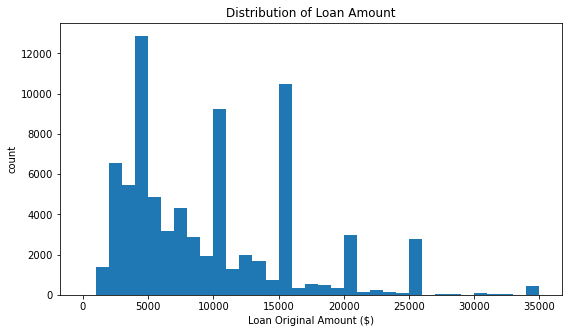

In [3]:
binsize = 1000
bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[9, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.title('Distribution of Loan Amount')
plt.show();

### Borrower count by Location/State

Are Borrowers more likely to be approved for a loan based on their location? Does Location affect the size of loan approved for Borrowers?

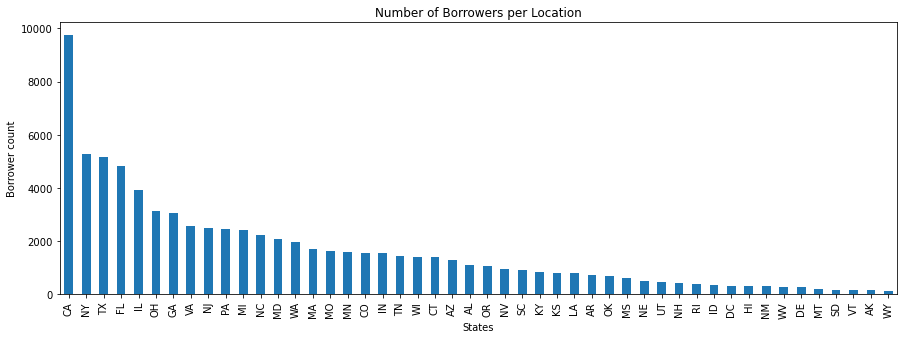

In [4]:

location = loan['BorrowerState'].value_counts()
plt.figure(figsize=(15, 5))
location.plot(kind='bar');

plt.title('Number of Borrowers per Location');
plt.xlabel('States');
plt.ylabel('Borrower count');

plt.xticks(rotation=90);

### Distribution of Borrowers Stated Incomes (Monthly)


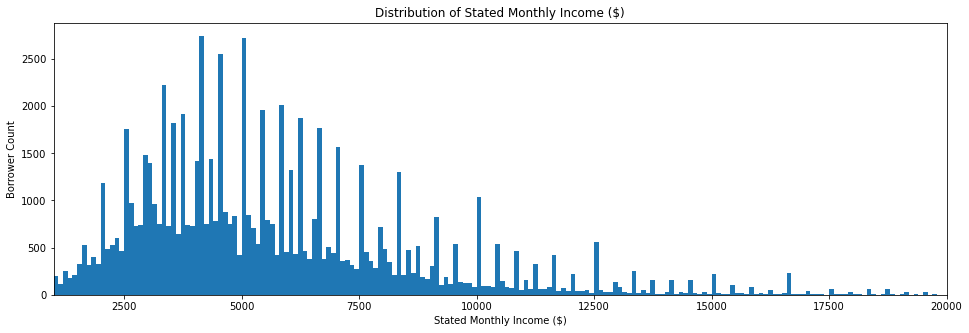

In [5]:
binsize = 100
bins = np.arange(0, loan['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[16, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlim(1000,20000)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Borrower Count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

The Distribution is skewed to the right. The data was capped between $1,000 and $20,000 monthly income in order to remove outlier incomes thus give a true picture of actual Borrower incomes. We notice that there are peaks at $4,000 and  $5,000 respectively showing majority of Borrowers earned around this range on a monthly basis.

### Correlation between Prosper Score and Loan Origination Amount


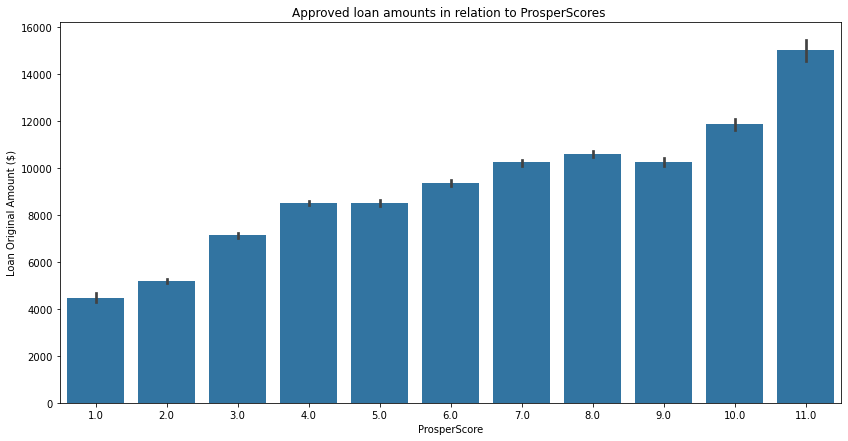

In [6]:
#Correlation between Prosper Score and Loan Origination Amount
plt.figure(figsize=[14,7])
base_color = sb.color_palette()[0]
sb.barplot(data=loan, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('Loan Original Amount ($)')
plt.title('Approved loan amounts in relation to ProsperScores ');

The visual depicts a positive correlation between Proper scores and Loan Origination Amount.

### Distribution of Borrower Home Ownership Status and Year to determine Loan Original Amount


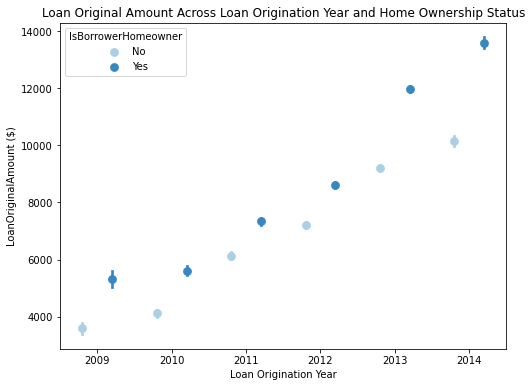

In [7]:
loan['LoanOriginationDate']= pd.to_datetime(loan['LoanOriginationDate'])
loan['LoanOriginationYear'] = loan['LoanOriginationDate'].dt.year

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Origination Year and Home Ownership Status')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Loan Origination Year')
plt.show();

Borrowers who owned homes in all the years under review had higher loan amounts approved as against Borrowers with no homes.

In [ ]:
!jupyter nbconvert Project_Loans_Part2_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Loans_Part2_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 652815 bytes to Project_Loans_Part2_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Project_Loans_Part2_Slide_Deck.slides.html
Use Control-C to stop this server
